#  Emotion Detection

Airlines frequently receive diverse reviews from passengers, spanning from negative feedback to positive evaluations. Recently, certain airlines have gained attention on social media due to complaints about uncomfortable seating. Manually sorting through these reviews is laborious and inefficient. Our objective is to automate emotion recognition, categorizing reviews into relevant themes. This enables the extraction of actionable insights for airlines to enhance their services. By undertaking this project, our team aims to contribute to improving overall travel experiences.


For the model building and evaluation, We have followed the steps below to towards achieving our project goals.



In [ ]:
%cd
!chmod -R +w Emotionmodel
!rm -r Emotionmodel
!chmod -R +w Emotiondata
!rm -r Emotiondata
!git clone https://github.com/geeknoobie/Emotionmodel.git
!git clone https://github.com/geeknoobie/Emotiondata.git

/root
chmod: cannot access 'Emotionmodel': No such file or directory
rm: cannot remove 'Emotionmodel': No such file or directory
chmod: cannot access 'Emotiondata': No such file or directory
rm: cannot remove 'Emotiondata': No such file or directory
Cloning into 'Emotionmodel'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 58 (delta 5), reused 11 (delta 2), pack-reused 39
Receiving objects: 100% (58/58), 73.04 MiB | 12.63 MiB/s, done.
Resolving deltas: 100% (11/11), done.
Cloning into 'Emotiondata'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 27 (delta 9), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (27/27), 23.29 MiB | 8.06 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk
nltk.download('punkt')
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## 1. Data Loading

In [ ]:
# loading the data
df = pd.read_csv('/root/Emotiondata/Book1.csv')
# splitting data into text and labels
texts = df['text'].tolist()
labels = df['emotion'].tolist()

## 2. EDA to understand the characteristics of the data.

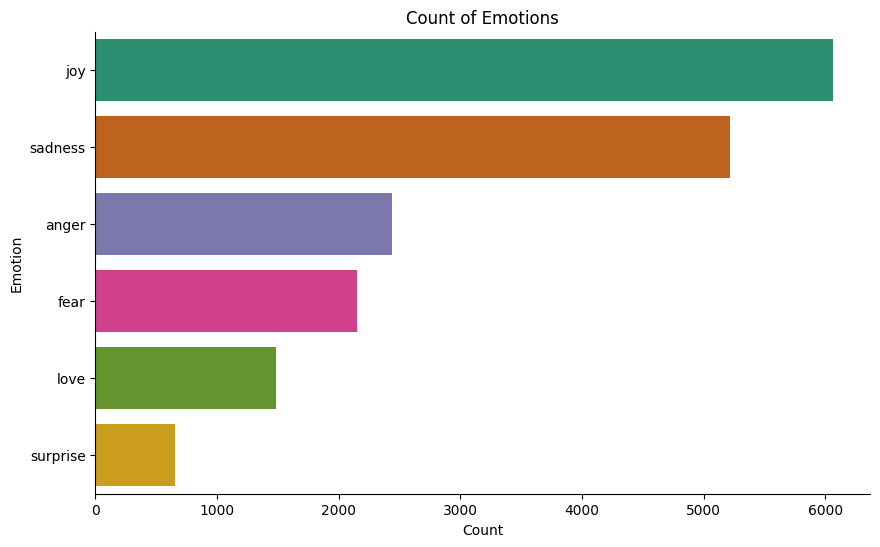

In [ ]:
# Calculate counts for each emotion category
emotion_counts = df['emotion'].value_counts()

# Sort the counts in descending order
sorted_emotion_counts = emotion_counts.sort_values(ascending=False)

# Plot the sorted counts
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_emotion_counts.values, y=sorted_emotion_counts.index, palette='Dark2')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.title('Count of Emotions')
plt.gcf().set_facecolor('none')
plt.gca().grid(alpha=0)
plt.show()

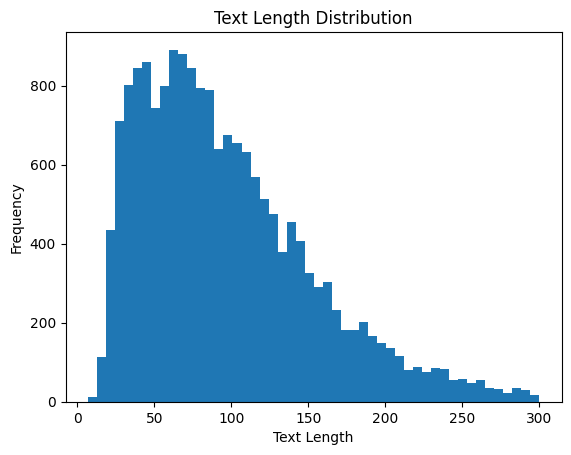

In [ ]:
# Calculate text lengths
text_lengths = df['text'].apply(len)
# Plot text length distribution
plt.hist(text_lengths, bins=50)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Text Length Distribution')
plt.show()

## 3.Text Pre-Processing:

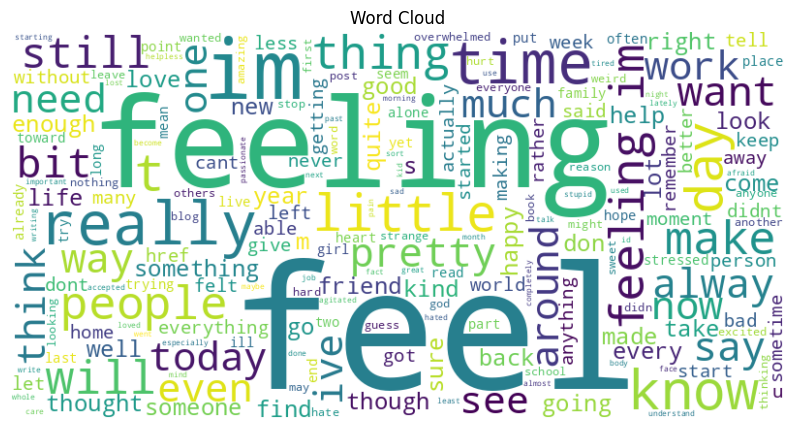

In [ ]:
# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Convert sequences back to words
word_index = tokenizer.word_index
tokens = [word for seq in sequences for word, index in word_index.items() if index in seq]

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


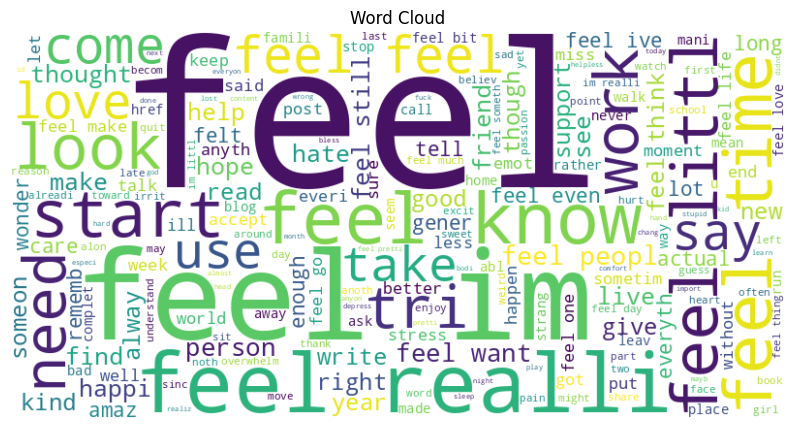

In [ ]:
import nltk
nltk.download('stopwords')

# Lower casing
tokens = [word.lower() for word in tokens]

# Remove punctuation
tokens = [word for word in tokens if word not in string.punctuation]

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Stemming using NLTK
stemmer = PorterStemmer()
tokens = [stemmer.stem(word) for word in tokens]
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [ ]:
# Pad sequences to ensure uniform length
maxlen = max(len(seq) for seq in sequences)
sequences_padded = pad_sequences(sequences, maxlen=maxlen)

In [ ]:
# Convert labels to one-hot encoding
label_to_index = {label: i for i, label in enumerate(set(labels))}
index_to_label = {i: label for label, i in label_to_index.items()}
labels_encoded = np.array([label_to_index[label] for label in labels])

In [ ]:
index_to_label

{0: 'surprise', 1: 'love', 2: 'sadness', 3: 'anger', 4: 'fear', 5: 'joy'}

## 4. Train-validation Split:

In [ ]:
# Split data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(sequences_padded, labels_encoded, test_size=0.2, random_state=42)

## 5. Model Building

In [ ]:
# Define the model
embedding_dims = 50
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dims, input_length=maxlen))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(label_to_index), activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
450/450 [==============================] - 56s 118ms/step - loss: 1.2978 - accuracy: 0.4941 - val_loss: 0.7953 - val_accuracy: 0.7217
Epoch 2/5
450/450 [==============================] - 48s 107ms/step - loss: 0.4649 - accuracy: 0.8515 - val_loss: 0.3709 - val_accuracy: 0.8756
Epoch 3/5
450/450 [==============================] - 49s 109ms/step - loss: 0.1963 - accuracy: 0.9353 - val_loss: 0.2971 - val_accuracy: 0.9031
Epoch 4/5
450/450 [==============================] - 50s 112ms/step - loss: 0.1196 - accuracy: 0.9619 - val_loss: 0.2911 - val_accuracy: 0.9064
Epoch 5/5
450/450 [==============================] - 47s 105ms/step - loss: 0.0883 - accuracy: 0.9715 - val_loss: 0.3065 - val_accuracy: 0.9008


## 6. Model Evaluation

In [ ]:
# loading the data for test account
df1 = pd.read_csv('/root/Emotiondata/Book2.csv')
# splitting data into text and labels
texts = df['text'].tolist()
labels = df['emotion'].tolist()
# Tokenize text data
tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(texts)
sequences1 = tokenizer1.texts_to_sequences(texts)
# Pad sequences to ensure uniform length
maxlen1 = max(len(seq) for seq in sequences1)
sequences_padded1 = pad_sequences(sequences1, maxlen=maxlen1)
# Convert labels to one-hot encoding
label_to_index1 = {label: i for i, label in enumerate(set(labels))}
index_to_label1 = {i: label for label, i in label_to_index1.items()}
labels_encoded1 = np.array([label_to_index1[label] for label in labels])
# Create testing set
X_train, X_test, y_train, y_test = train_test_split(sequences_padded, labels_encoded, test_size=0.99, random_state=42)

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

557/557 [==============================] - 10s 18ms/step - loss: 0.1013 - accuracy: 0.9681
Test accuracy: 0.9680696129798889


## 7.Testing the model on random texts

In [ ]:
# Example usage
def predict_emotion(text):
    # Preprocess text
    sequence = tokenizer.texts_to_sequences([text])
    sequence_padded = pad_sequences(sequence, maxlen=maxlen)

    # Predict emotion
    prediction = model.predict(sequence_padded)[0]
    predicted_index = np.argmax(prediction)
    predicted_label = index_to_label[predicted_index]
    return predicted_label

In [ ]:
while True:
    # Input text
    input_text = input("Enter text (type 'exit' to quit): ")

    # Check if user wants to exit
    if input_text.lower() == 'exit':
        print("Exiting...")
        break

    # Predict emotion
    predicted_emotion = predict_emotion(input_text)
    print(f"Statement: {input_text},\n Predicted emotion: {predicted_emotion}")

Enter text (type 'exit' to quit): It is sunny today!
1/1 [==============================] - 0s 458ms/step
Statement: It is sunny today!,
 Predicted emotion: joy
Enter text (type 'exit' to quit): exit
Exiting...


## 8.Airline reviews

In [ ]:
ar_df = pd.read_csv('/root/Emotiondata/Airline_review.csv')
ar_df[:5]

,Review
0,Moroni to Moheli. Turned out to be a pretty de...
1,Moroni to Anjouan. It is a very small airline....
2,Anjouan to Dzaoudzi. A very small airline and ...
3,Please do a favor yourself and do not fly with...
4,Do not book a flight with this airline! My fri...


In [ ]:
ar_df['predicted_emotion'] = ''
ar_df

,Review,predicted_emotion
0,Moroni to Moheli. Turned out to be a pretty de...,
1,Moroni to Anjouan. It is a very small airline....,
2,Anjouan to Dzaoudzi. A very small airline and ...,
3,Please do a favor yourself and do not fly with...,
4,Do not book a flight with this airline! My fri...,
...,...,...
23166,Bangkok to Tokyo. I’ve flown many low cost air...,
23167,Avoid at all costs. I booked flights to go fro...,
23168,Flight was leaving at 23.15 and after an hour ...,
23169,Zipair is JAL’s budget airline. They don’t hav...,


In [ ]:
# Iterate over each review
for i, r in enumerate(ar_df['Review']):
    predicted_emotion = predict_emotion(r)
    ar_df.at[i, 'predicted_emotion'] = predicted_emotion

1/1 [==============================] - 0s 24ms/step


In [ ]:
ar_df

,Review,predicted_emotion
0,Moroni to Moheli. Turned out to be a pretty de...,joy
1,Moroni to Anjouan. It is a very small airline....,joy
2,Anjouan to Dzaoudzi. A very small airline and ...,sadness
3,Please do a favor yourself and do not fly with...,surprise
4,Do not book a flight with this airline! My fri...,sadness
...,...,...
23166,Bangkok to Tokyo. I’ve flown many low cost air...,sadness
23167,Avoid at all costs. I booked flights to go fro...,anger
23168,Flight was leaving at 23.15 and after an hour ...,joy
23169,Zipair is JAL’s budget airline. They don’t hav...,joy


# Conclusion: